<a href="https://colab.research.google.com/github/jhportfolio1/MS-AI-School-Python-Azure/blob/main/PythonAzure03_Queue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Azure 에서 큐 다루기

## 1) 큐 만들기 위해 패키지 가져오기

In [1]:
!pip install azure-storage-queue==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.1 MB/s eta 0:00:00


In [2]:
from azure.storage.queue import QueueService, QueueMessageFormat


## 2) 큐 만들어서 큐 서비스에 연결하기

- 큐 엑세스 포인트 연결

In [6]:
, queueservice
connect_str='DefaultEndpointsProtocol=https;AccountName=labuser97storage;AccountKey=bM4U7r64nkPBcNDp6MLcX6FEHcZa0biT2nmpffvWJdqgDrc7LtDPFz+2S0Ti8vWB3wSS6XlaUvH0+AStOO+s2g==;EndpointSuffix=core.windows.net'

- 큐 생성 및 연결

In [7]:
queue_name = 'queue-myqueue'
queue_service = QueueService(connection_string=connect_str)

queue_service.create_queue(queue_name)

False

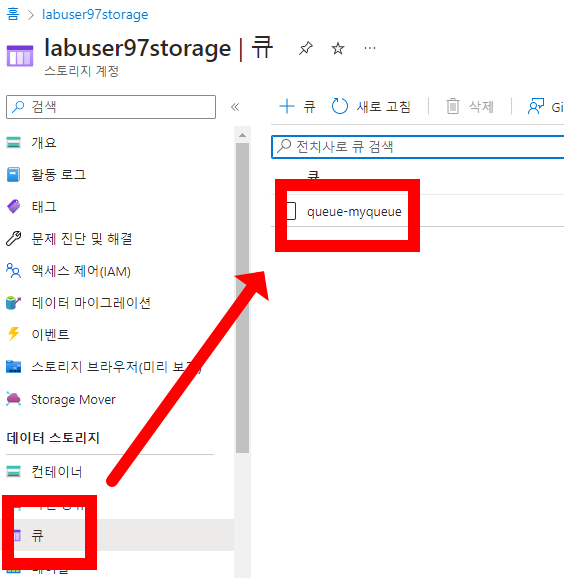

## 3) 큐에 메세지 넣기

In [19]:
queue_service.encode_function = QueueMessageFormat.binary_base64encode
queue_service.decode_function = QueueMessageFormat.binary_base64decode

In [20]:
import base64
message = 'Hello World'
print('Adding message: ' + message)

Adding message: Hello World


- 메세지를 유니코드 방식으로 엔코딩 하기

In [21]:
message = base64.b64encode(message.encode('utf-8'))
queue_service.put_message(queue_name, message)

## 4) 큐에서 메세지 가져오기

- Peeked message : 엿보기
- Get message : 메세지 통으로 가져오기 -> 메세지가 Queue 에서 빠져나옴

In [22]:
messages = queue_service.peek_messages(queue_name)

- 가져온 메세지 열기

In [24]:
for peeked_message in messages:
  message = base64.b64decode(peeked_message.content)
  print('Peeked message: ' + message.decode('utf-8'))

Peeked message: Hello World


- get으로 메세지 빼오기

In [29]:
messages = queue_service.get_messages(queue_name)

for msg in messages:
  message = base64.b64decode(msg.content)
  print('Got message: ' + message.decode('utf-8'))

Got message: Hello World


## 5) 큐 삭제하기

In [30]:
queue_service.delete_queue(queue_name)


True